# 淘宝用户行为数据分析

数据集地址：https://tianchi.aliyun.com/dataset/649?spm=5176.12281976.J_3941670930.10.278012c4DsfWE6

## 导入相关包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)
np.random.seed(42)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 数据概览

In [2]:
# 读取数据
user_data = pd.read_csv('data/UserBehavior.csv', memory_map=True, nrows=1000000, dtype=str)
# 查看数据
user_data.head()

,1,2268318,2520377,pv,1511544070
0,1,2333346,2520771,pv,1511561733
1,1,2576651,149192,pv,1511572885
2,1,3830808,4181361,pv,1511593493
3,1,4365585,2520377,pv,1511596146
4,1,4606018,2735466,pv,1511616481


In [3]:
# 查看数据的基本信息
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   1           1000000 non-null  object
 1   2268318     1000000 non-null  object
 2   2520377     1000000 non-null  object
 3   pv          1000000 non-null  object
 4   1511544070  1000000 non-null  object
dtypes: object(5)
memory usage: 38.1+ MB


In [4]:
# 给数据添加表头
user_data.columns = ['user_id', 'item_id', 'category_id', 'behavior_type', 'timestamp']

In [5]:
# 查看数据的基本信息
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   user_id        1000000 non-null  object
 1   item_id        1000000 non-null  object
 2   category_id    1000000 non-null  object
 3   behavior_type  1000000 non-null  object
 4   timestamp      1000000 non-null  object
dtypes: object(5)
memory usage: 38.1+ MB


In [6]:
# 查看数据的基本统计信息
user_data.describe()

,user_id,item_id,category_id,behavior_type,timestamp
count,1000000,1000000,1000000,1000000,1000000
unique,9739,399115,5796,4,499049
top,115477,812879,4756105,pv,1512206464
freq,781,304,51877,896106,27


In [7]:
# 查看数据的缺失值
user_data.isnull().sum()

user_id          0
item_id          0
category_id      0
behavior_type    0
timestamp        0
dtype: int64

In [8]:
# 查看数据的重复值
user_data.duplicated().sum()

0

In [9]:
# 查看数据的唯一值
user_data.nunique()

user_id            9739
item_id          399115
category_id        5796
behavior_type         4
timestamp        499049
dtype: int64

In [10]:
# 查看数据的行数和列数
user_data.shape

(1000000, 5)

## 数据预处理

In [11]:
# 新增日期和小时列
user_data['date'] = pd.to_datetime(user_data['timestamp'], unit='s').dt.date
user_data['hour'] = pd.to_datetime(user_data['timestamp'], unit='s').dt.hour

In [12]:
# 查看数据
user_data.head()

,user_id,item_id,category_id,behavior_type,timestamp,date,hour
0,1,2333346,2520771,pv,1511561733,2017-11-24,22
1,1,2576651,149192,pv,1511572885,2017-11-25,1
2,1,3830808,4181361,pv,1511593493,2017-11-25,7
3,1,4365585,2520377,pv,1511596146,2017-11-25,7
4,1,4606018,2735466,pv,1511616481,2017-11-25,13


In [13]:
# 查看数据的类型
user_data.dtypes

user_id          object
item_id          object
category_id      object
behavior_type    object
timestamp        object
date             object
hour              int64
dtype: object

In [14]:
# 对数据按照日期进行排序
user_data.sort_values(by='date', ascending=True, inplace=True)

In [15]:
# 查看首尾数据
user_data.head()

,user_id,item_id,category_id,behavior_type,timestamp,date,hour
4169,1000169,1328010,959452,pv,1505117799,2017-09-11,8
649770,112815,2489903,1487591,pv,1509965092,2017-11-06,10
544743,108233,4336503,3531700,pv,1510320815,2017-11-10,13
979960,12775,2897780,886203,pv,1510526244,2017-11-12,22
689595,114678,3662082,1080785,pv,1510467580,2017-11-12,6


In [16]:
user_data.tail()

,user_id,item_id,category_id,behavior_type,timestamp,date,hour
264849,1011960,3859744,796856,pv,1512296867,2017-12-03,10
264850,1011960,4918494,4993094,pv,1512296892,2017-12-03,10
430362,103259,1801002,1879194,pv,1512311167,2017-12-03,14
170925,1007495,3520752,883960,pv,1512309641,2017-12-03,14
488408,105770,3914509,4227487,pv,1512308982,2017-12-03,13


In [17]:
# 查看behavior_type的值
user_data['behavior_type'].unique()

array(['pv', 'fav', 'cart', 'buy'], dtype=object)

In [18]:
# 查看date的值
user_data['date'].unique()

array([datetime.date(2017, 9, 11), datetime.date(2017, 11, 6),
       datetime.date(2017, 11, 10), datetime.date(2017, 11, 12),
       datetime.date(2017, 11, 13), datetime.date(2017, 11, 14),
       datetime.date(2017, 11, 16), datetime.date(2017, 11, 17),
       datetime.date(2017, 11, 18), datetime.date(2017, 11, 19),
       datetime.date(2017, 11, 20), datetime.date(2017, 11, 21),
       datetime.date(2017, 11, 22), datetime.date(2017, 11, 23),
       datetime.date(2017, 11, 24), datetime.date(2017, 11, 25),
       datetime.date(2017, 11, 26), datetime.date(2017, 11, 27),
       datetime.date(2017, 11, 28), datetime.date(2017, 11, 29),
       datetime.date(2017, 11, 30), datetime.date(2017, 12, 1),
       datetime.date(2017, 12, 2), datetime.date(2017, 12, 3)],
      dtype=object)

In [19]:
# 对上文按照日期排序的数据按位置重新生成索引
user_data.reset_index(drop=True, inplace=True)

In [20]:
user_data.head()

,user_id,item_id,category_id,behavior_type,timestamp,date,hour
0,1000169,1328010,959452,pv,1505117799,2017-09-11,8
1,112815,2489903,1487591,pv,1509965092,2017-11-06,10
2,108233,4336503,3531700,pv,1510320815,2017-11-10,13
3,12775,2897780,886203,pv,1510526244,2017-11-12,22
4,114678,3662082,1080785,pv,1510467580,2017-11-12,6


In [21]:
user_data.tail()

,user_id,item_id,category_id,behavior_type,timestamp,date,hour
999995,1011960,3859744,796856,pv,1512296867,2017-12-03,10
999996,1011960,4918494,4993094,pv,1512296892,2017-12-03,10
999997,103259,1801002,1879194,pv,1512311167,2017-12-03,14
999998,1007495,3520752,883960,pv,1512309641,2017-12-03,14
999999,105770,3914509,4227487,pv,1512308982,2017-12-03,13


In [23]:
# 查看数据的描述性统计信息
user_data.describe(include = ['object'])

,user_id,item_id,category_id,behavior_type,timestamp,date
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,9739,399115,5796,4,499049,24
top,115477,812879,4756105,pv,1512206464,2017-12-02
freq,781,304,51877,896106,27,139436


In [25]:
# 根据描述性信息发现，user_id为115477的用户行为最多，可能是刷单用户
user_data[user_data['user_id'] == '115477']

,user_id,item_id,category_id,behavior_type,timestamp,date,hour
11351,115477,3147125,2558244,pv,1511539585,2017-11-24,16
11407,115477,4601734,2558244,pv,1511566549,2017-11-24,23
11408,115477,2188021,2558244,pv,1511566543,2017-11-24,23
11409,115477,4108973,3738615,pv,1511566467,2017-11-24,23
11411,115477,2939327,3738615,pv,1511566422,2017-11-24,23
...,...,...,...,...,...,...,...
925703,115477,5067429,2735466,pv,1512312888,2017-12-03,14
925704,115477,1365259,2735466,pv,1512312897,2017-12-03,14
925705,115477,1031525,2735466,pv,1512312910,2017-12-03,14
925706,115477,2544318,2735466,pv,1512312948,2017-12-03,14


## 计算PV和UV

### 计算PV
PV是指页面浏览量，即页面被访问的次数。PV是衡量网站流量大小的重要指标。

In [27]:
pv_daily = user_data[user_data['behavior_type'] == 'pv'].groupby('date')['user_id'].count()
# 查看pv_daily
pv_daily.describe()

count        24.000000
mean      37337.750000
std       48784.736916
min           1.000000
25%           1.750000
50%          12.500000
75%       92316.500000
max      125130.000000
Name: user_id, dtype: float64

In [28]:
# 重命名列名
pv_daily.rename('pv', inplace=True)

date
2017-09-11         1
2017-11-06         1
2017-11-10         1
2017-11-12         2
2017-11-13         1
2017-11-14         1
2017-11-16         2
2017-11-17         5
2017-11-18         4
2017-11-19         5
2017-11-20         1
2017-11-21        12
2017-11-22        13
2017-11-23        47
2017-11-24     11329
2017-11-25     94656
2017-11-26     94037
2017-11-27     87329
2017-11-28     88913
2017-11-29     91743
2017-11-30     94533
2017-12-01    100934
2017-12-02    125130
2017-12-03    107406
Name: pv, dtype: int64

### 计算UV
UV是指访问网站的独立IP数，即访问网站的不同用户数。UV是衡量网站流量质量的重要指标。

In [29]:
uv_daily = user_data[user_data['behavior_type'] == 'pv'].groupby('date')['user_id'].nunique()
# 查看uv_daily
uv_daily.describe()

count      24.000000
mean     2841.125000
std      3638.493552
min         1.000000
25%         1.750000
50%         9.500000
75%      6840.250000
max      9029.000000
Name: user_id, dtype: float64

In [30]:
# 重命名列名
uv_daily.rename('uv', inplace=True)

date
2017-09-11       1
2017-11-06       1
2017-11-10       1
2017-11-12       2
2017-11-13       1
2017-11-14       1
2017-11-16       2
2017-11-17       2
2017-11-18       4
2017-11-19       5
2017-11-20       1
2017-11-21      10
2017-11-22       9
2017-11-23      33
2017-11-24    1801
2017-11-25    6785
2017-11-26    6922
2017-11-27    6809
2017-11-28    6813
2017-11-29    6943
2017-11-30    7010
2017-12-01    7182
2017-12-02    9029
2017-12-03    8820
Name: uv, dtype: int64

In [31]:
# 将pv_daily和uv_daily合并
pv_uv_daily = pd.concat([pv_daily, uv_daily], axis=1)

In [32]:
# 查看pv_uv_daily
pv_uv_daily.head()

,pv,uv
date,,
2017-09-11,1,1
2017-11-06,1,1
2017-11-10,1,1
2017-11-12,2,2
2017-11-13,1,1


In [33]:
# 保存pv_uv_daily
pv_uv_daily.to_csv('data/pv_uv_daily.csv')

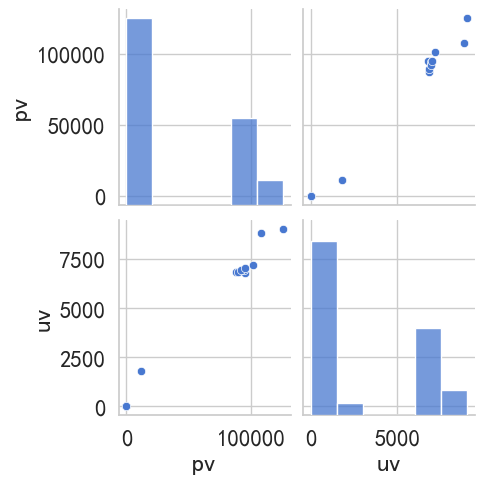

In [34]:
# 查看pv_uv_daily的关系
sns.pairplot(pv_uv_daily)

In [35]:
# 查看pv_uv_daily的相关性
pv_uv_daily.corr(method='pearson')

,pv,uv
pv,1.000000,0.996844
uv,0.996844,1.000000


<Axes: >

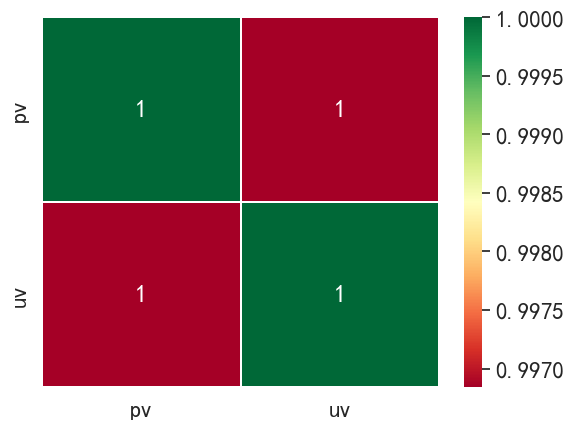

In [39]:
# 绘制pv_uv_daily的相关性热力图
sns.heatmap(pv_uv_daily.corr(method='pearson'), annot=True, cmap='RdYlGn', linewidths=0.2)

<Axes: xlabel='date'>

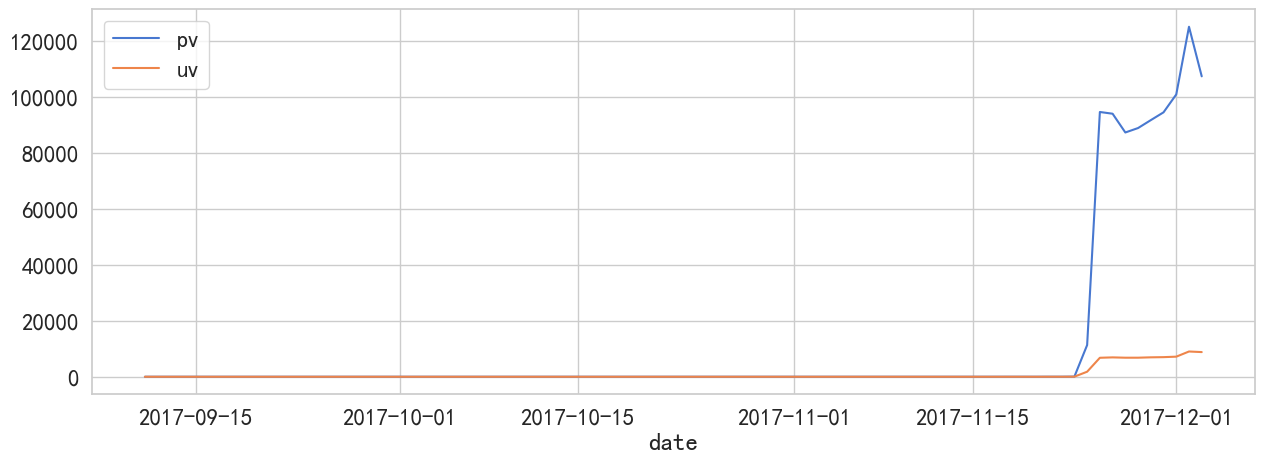

In [42]:
# 绘制pv_uv_daily的折线图
pv_uv_daily.plot(figsize=(15, 5))

### 从小时级别的数据中计算PV和UV

In [43]:
pv_hourly = user_data[user_data['behavior_type'] == 'pv'].groupby('hour')['user_id'].count()

In [44]:
pv_hourly.rename('pv', inplace=True)

hour
0     30021
1     37190
2     43656
3     42710
4     42179
5     46470
6     45939
7     47262
8     46905
9     41433
10    42937
11    55057
12    65447
13    75094
14    74749
15    55847
16    30397
17    13855
18     7986
19     5636
20     4970
21     6060
22    12074
23    22232
Name: pv, dtype: int64

In [45]:
uv_hourly = user_data[user_data['behavior_type'] == 'pv'].groupby('hour')['user_id'].nunique()

In [46]:
# 重命名列名
uv_hourly.rename('uv', inplace=True)

hour
0     4170
1     4937
2     5484
3     5560
4     5599
5     5799
6     5651
7     5771
8     5748
9     5525
10    5471
11    6010
12    6334
13    6523
14    6242
15    4894
16    2984
17    1558
18     943
19     674
20     604
21     825
22    1684
23    3121
Name: uv, dtype: int64

In [47]:
# 将pv_hourly和uv_hourly合并
pv_uv_hourly = pd.concat([pv_hourly, uv_hourly], axis=1)

In [48]:
# 查看pv_uv_hourly
pv_uv_hourly.head()

,pv,uv
hour,,
0,30021,4170
1,37190,4937
2,43656,5484
3,42710,5560
4,42179,5599


In [49]:
# 保存pv_uv_hourly
pv_uv_hourly.to_csv('data/pv_uv_hourly.csv')

In [50]:
# 查看pv_uv_hourly的相关系数
pv_uv_hourly.corr(method='pearson')

,pv,uv
pv,1.000000,0.932948
uv,0.932948,1.000000


<Axes: >

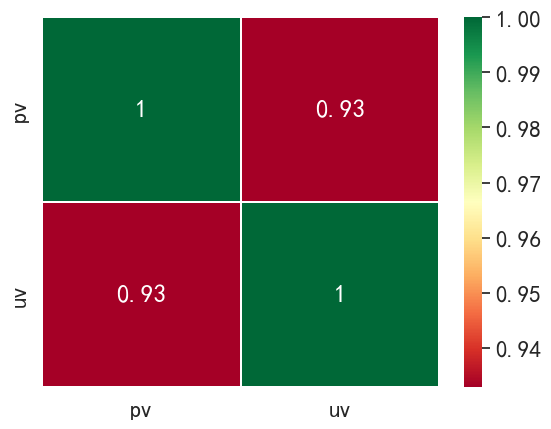

In [52]:
# 绘制pv_uv_hourly的相关性热力图
sns.heatmap(pv_uv_hourly.corr(method='pearson'), annot=True, cmap='RdYlGn', linewidths=0.2)

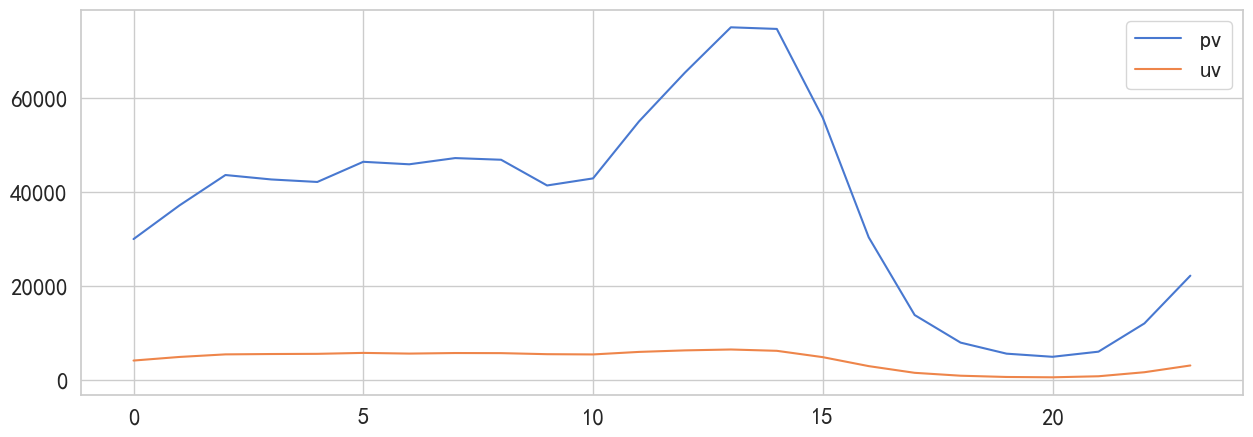

In [53]:
# 绘制pv_uv_hourly的折线图
plt.figure(figsize=(15, 5))
plt.plot(pv_uv_hourly.index, pv_uv_hourly['pv'], label='pv')
plt.plot(pv_uv_hourly.index, pv_uv_hourly['uv'], label='uv')
plt.legend()
plt.show()

## 从小时级别的数据中分析购买、收藏、加购物车的行为

In [54]:
cart_hourly = user_data[user_data['behavior_type'] == 'cart'].groupby('hour')['user_id'].count() # 加入购物车
fav_hourly = user_data[user_data['behavior_type'] == 'fav'].groupby('hour')['user_id'].count() # 收藏
buy_hourly = user_data[user_data['behavior_type'] == 'buy'].groupby('hour')['user_id'].count() # 购买

In [55]:
# 重命名列名
cart_hourly.rename('cart', inplace=True)
fav_hourly.rename('fav', inplace=True)
buy_hourly.rename('buy', inplace=True)

hour
0      643
1      970
2     1279
3     1272
4     1264
5     1334
6     1178
7     1214
8     1252
9     1081
10     898
11    1181
12    1355
13    1380
14    1367
15     962
16     576
17     236
18     148
19      65
20      88
21      73
22     155
23     388
Name: buy, dtype: int64

In [58]:
# 将pv_hourly, uv_hourly, cart_hourly, fav_hourly, buy_hourly合并
total_hourly = pd.concat([pv_hourly, uv_hourly, cart_hourly, fav_hourly, buy_hourly], axis=1)

In [59]:
# 查看total_hourly
total_hourly.head()

,pv,uv,cart,fav,buy
hour,,,,,
0,30021,4170,1869,988,643
1,37190,4937,2323,1259,970
2,43656,5484,2666,1418,1279
3,42710,5560,2663,1384,1272
4,42179,5599,2538,1333,1264


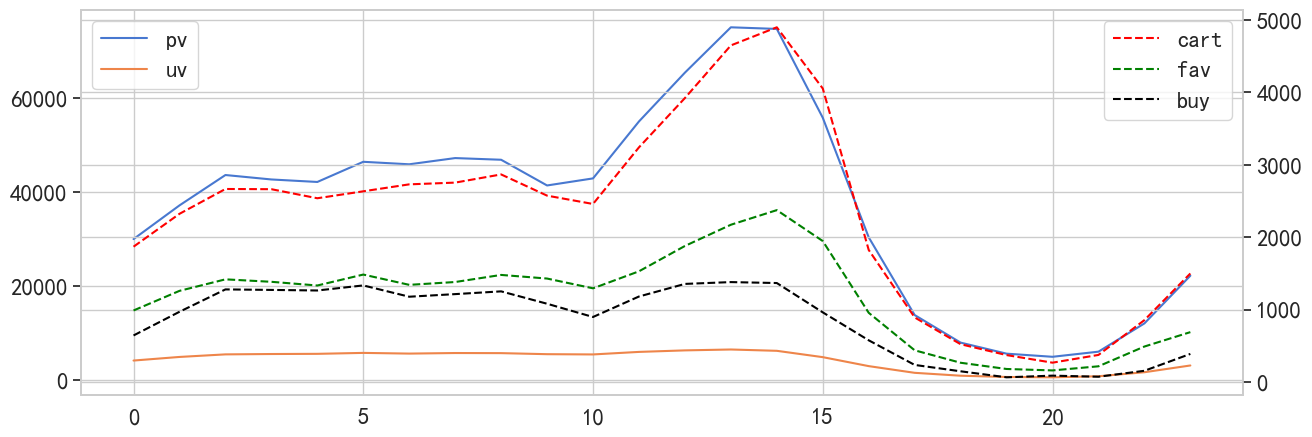

In [64]:
# 绘制total_hourly的折线图
fig, ax1 = plt.subplots(figsize=(15, 5))
ax2 = ax1.twinx()
ax1.plot(total_hourly.index, total_hourly['pv'], label='pv')
ax1.plot(total_hourly.index, total_hourly['uv'], label='uv')
ax2.plot(total_hourly.index, total_hourly['cart'], label='cart', color='red', linestyle='--')
ax2.plot(total_hourly.index, total_hourly['fav'], label='fav', color='green', linestyle='--')
ax2.plot(total_hourly.index, total_hourly['buy'], label='buy', color='black', linestyle='--')
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()

## ARPU和ARPPU

### 计算ARPU
ARPU是指平均每个用户的收入，即每个用户平均消费金额。ARPU是衡量网站盈利能力的重要指标。

In [65]:
user_buy = user_data[user_data['behavior_type'] == 'buy'].groupby('user_id')['item_id'].count()
# 查看user_buy
user_buy.head()

user_id
100        8
1000001    1
1000011    2
100002     1
1000027    2
Name: item_id, dtype: int64

In [66]:
# 查看user_buy的描述性统计信息
user_buy.describe()

count    6689.000000
mean        3.043654
std         3.250811
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        72.000000
Name: item_id, dtype: float64

<Axes: xlabel='item_id', ylabel='Density'>

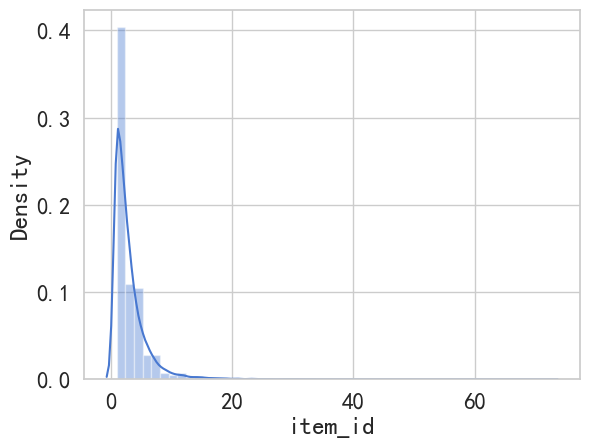

In [67]:
# 查看user_buy的分布
sns.distplot(user_buy)

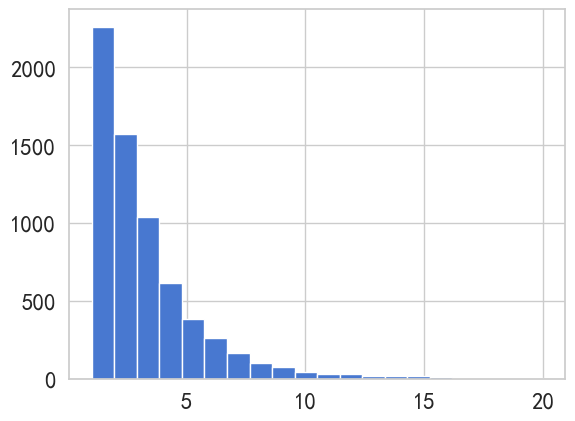

In [70]:
plt.hist(user_buy[user_buy<=20], bins=20)
plt.show()

### 计算ARPPU
ARPPU是指平均每次付费用户的收入，即每次付费用户平均消费金额。ARPPU是衡量网站盈利能力的重要指标。

In [73]:
arppu = user_data[user_data['behavior_type'] == 'buy'].groupby('user_id')['item_id'].count().mean()

In [74]:
# 查看arppu
arppu

3.0436537599043207

## 计算转化率
转化率是指用户从访问网站到完成某个行为的比率。转化率是衡量网站运营效果的重要指标。

In [75]:
conver_rate = user_data[user_data['behavior_type'] == 'buy'].groupby('user_id')['item_id'].count().count() / user_data[user_data['behavior_type'] == 'pv'].groupby('user_id')['item_id'].count().count()
conver_rate

0.6891613434988667

## 统计商品的销售情况

In [77]:
item_buy = user_data[user_data['behavior_type'] == 'buy'].groupby('item_id')['user_id'].count()

In [78]:
# 查看item_buy
item_buy.head()

item_id
1000273    1
1000333    1
1000533    1
1002103    1
1002346    1
Name: user_id, dtype: int64

In [79]:
item_buy.describe()

count    17565.000000
mean         1.159066
std          0.546493
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: user_id, dtype: float64

In [80]:
top_100_item = item_buy.sort_values(ascending=False)[:100]

In [81]:
# 查看top_100_item
top_100_item.head(100)

item_id
3122135    17
2964774    11
3237415    11
2124040    11
4401268    10
           ..
4252236     4
447253      4
3618277     4
4568476     4
213747      4
Name: user_id, Length: 100, dtype: int64

## 统计商品的类别

In [83]:
item_cate = user_data.groupby('category_id')['item_id'].nunique()
item_cate

category_id
1000959      6
1001152      1
1003726      2
1004392     17
1007591      1
          ... 
998114      15
999101       1
999348       1
999755     111
999980      10
Name: item_id, Length: 5796, dtype: int64

<Axes: xlabel='item_id', ylabel='Density'>

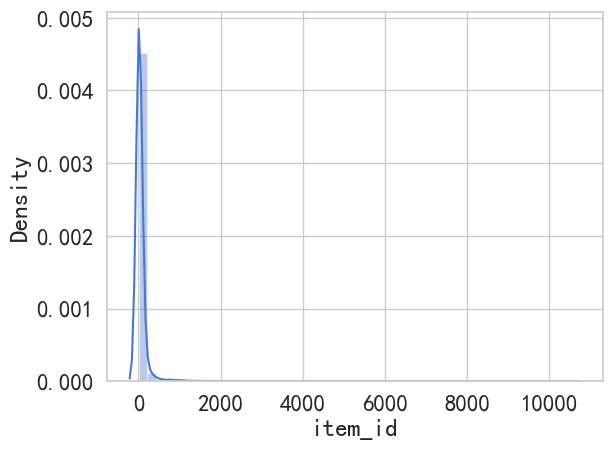

In [84]:
# 查看item_cate的分布
sns.distplot(item_cate)

<Axes: xlabel='item_id', ylabel='Density'>

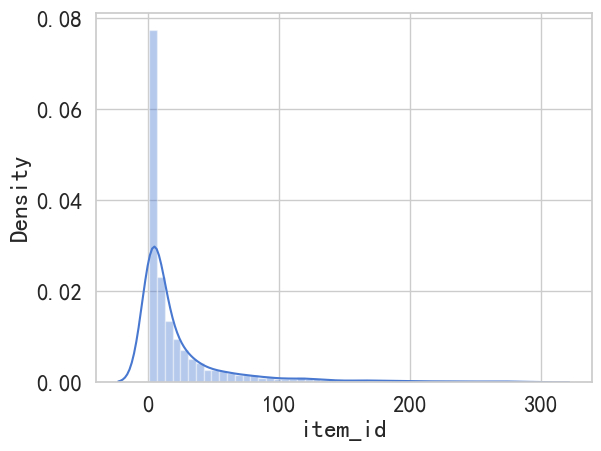

In [89]:
# 查看小于300的item_cate的分布
sns.distplot(item_cate[item_cate < 300])